<a href="https://colab.research.google.com/github/DanielCadavid/InteligenciaArtificial/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PERCEPTRON
El siguiente modelo se basa en la representacion de una neurona, para ello se crea un objeto Perceptron el cual sintetiza los procesos de calculo
#####https://insidelearningmachines.com/perceptron_algorithm_from_scratch/

>En el siguiente codigo se traen librerias, y ademas un set de datos para trabajar

In [1]:
# imports
import numpy as np
from typing import Dict, List
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score


##Clase Perceptron

In [2]:
class Perceptron(object): #Creacion de Clase Perceptron

    def __init__(self, lr: float=1e-2, max_epochs: int=100, tol: float=1e-3, verbose: bool=False) -> None:

        #Funcion constructor

        #Variables: lr: taza de aprendizaje, determina el vector w por cada iteracion,
                  # max_epochs: Determina el numero maximo de epocas antes de finalizar el entrenamiento.
                  #tol: Tolerancia para finalizar el entrenamiento
                  #verbose: Control de cualquier anomalia en la ejecucion

        if lr <= 0:
            raise ValueError(f'La taza de aprendizaje debe ser positiva, .-. ,: {lr}')
        if max_epochs <= 0:
            raise ValueError(f'Las epocas a estudiar deben ser un numero positivo, ._. ,: {max_epochs}')
        if tol <= 0:
            raise ValueError(f'El perceptron soporta tolerancias positivas, =//,: {tol}')
        self.lr            = lr
        self.epochs        = max_epochs
        self.tol           = tol
        self.w             = np.array([])
        self.verbose       = verbose
        self.training_loss = []
        if self.verbose:
            print(f'Se ha creado un objeto Perceptron con : Taza de Aprendizaje = {self.lr}, Epocas = {self.epochs}, tol = {self.tol}')

    def __del__(self) -> None:

        #Funcion para eliminar
        del self.lr
        del self.epochs
        del self.tol
        del self.w
        del self.verbose
        del self.training_loss

    def fit(self, X : np.array, y : np.array) -> None:

      #Clase para entrenar el perceptron
      #Entradas: X-> entradas Tipo Numpy Array[numero de ejemplos, munero de caracteristicas]
              #  Y-> Arreglo Tipo Numpy con etiquetas binarias[numero de ejemplos]

        # Añadir columna para el bias/umbral
        X = np.insert(X, 0, 1, axis=1)
        # Inicializacion del peso
        self.w = np.zeros(X.shape[1])
        # Inicializacion de la variable de perdida
        loss = 1e8

        # Ciclo para el entrenamiento dado el numero de epocas
        for e in range(self.epochs):

            epoch_loss = 0

            # Ciclo para cada entrenamiento simple
            for x_i,y_i in zip(X,y):

                # Activacion
                z  = np.dot(x_i,self.w)
                yp = np.round(z >= 0)
                # Actualizacion de peso
                self.w += self.lr*(y_i-yp)*x_i
                # Guardar la variable perdida
                epoch_loss += np.abs(y_i-yp)

            # Comprobacion de la parada temprana
            new_loss = (1/X.shape[0])*epoch_loss
            if (loss < (new_loss - self.tol)) or (new_loss < self.tol):
                if self.verbose:
                    print(f'El entrenamiento ha tenido una parada temprana en la epoca: {e}, con perdida: {new_loss}')
                break
            else:
                loss = new_loss
                self.training_loss.append(loss)
                if self.verbose:
                    print(f'Epoca: {e}, Perdida: {loss}')

    def predict(self, X : np.array) -> np.array:
        #Funcion para hacer una prediccion, en donde se asignan clases etiquetadas a los aprendizajes donde
        # ha tenido un valor en los pesos y en las entradas de la activacion
        if self.w.size == 0:
            raise Exception("Al parecer el modelo no esta entrenado correctamente")
        # Columna para el bias/umbral
        X = np.insert(X, 0, 1, axis=1)
        # Producto punto de los ejemplos
        z = np.einsum('ij,j->i', X, self.w)
        # Pase y retorno de la funcion de activacion
        yp = np.round(z >= 0)
        return yp

    def get_weights(self) -> np.array:

        """
        Function to return model weights

        Output:
            numpy array containing the model weights
        """
        return self.w

    def get_training_loss(self) -> List:
        """
        Function to return training loss

        Output:
            list containing the training loss, one entry per epoch
        """
        return self.training_loss

    def get_params(self, deep : bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
            deep -> boolean input parameter
        Outputs:
            Dict -> dictionary of stored class input parameters
        """
        return {'lr':self.lr,
                'max_epochs':self.epochs,
                'tol':self.tol,
                'verbose':self.verbose}

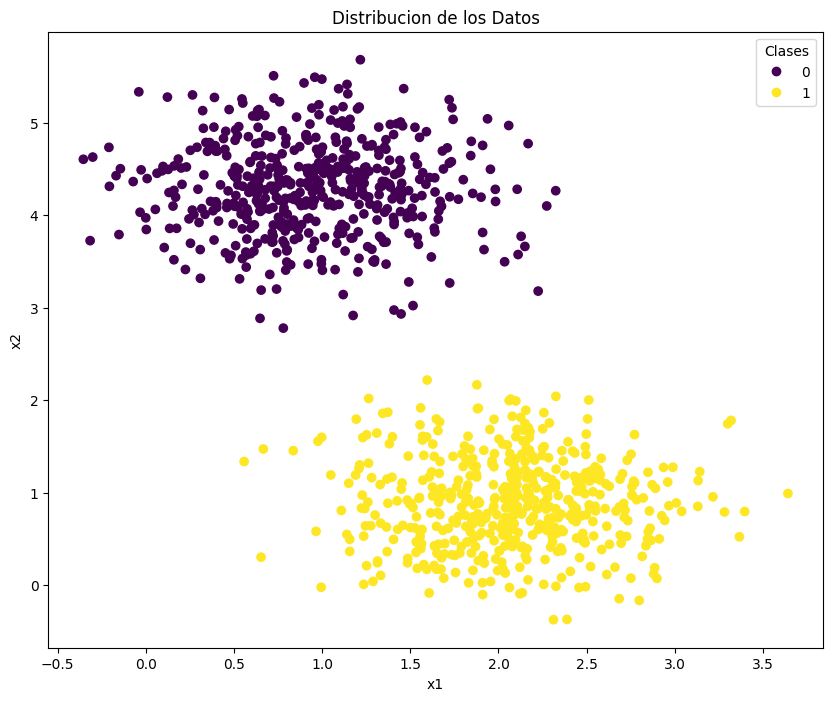

In [3]:
# Creacion de la base de datos
X,y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=0.5, random_state=0)

# Visualizacion
fig, ax = plt.subplots(figsize=(10,8))
sc      = ax.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribucion de los Datos')
ax.legend(*sc.legend_elements(), title='Clases')
plt.show()

In [4]:
# Prueba del entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Declaracion de una instancia de la clase Perceptron
model1 = Perceptron(lr=0.1, verbose=True)

Se ha creado un objeto Perceptron con : Taza de Aprendizaje = 0.1, Epocas = 100, tol = 0.001


In [5]:
# Llenar el modelo con los entrenamientos, donde encontro una perdida de 0 en la epoca 7, es decir que el perceptron esta listo
model1.fit(X_train,y_train)

Epoca: 0, Perdida: 0.01375
Epoca: 1, Perdida: 0.01375
Epoca: 2, Perdida: 0.00625
Epoca: 3, Perdida: 0.00625
Epoca: 4, Perdida: 0.00625
Epoca: 5, Perdida: 0.00375
Epoca: 6, Perdida: 0.0025
El entrenamiento ha tenido una parada temprana en la epoca: 7, con perdida: 0.0


In [6]:
# Predicciones con los datos de prueba
y_pred = model1.predict(X_test)

# Precision de la Prediccion
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred,average='weighted')
rec = recall_score(y_test,y_pred,average='weighted')
f1  = f1_score(y_test,y_pred,average='weighted')
print(f'Accuracy score: {acc:.4f}')
print(f'Precision score: {pre:.4f}')
print(f'Recall score: {rec:.4f}')
print(f'F1 score: {f1:.4f}')

Accuracy score: 1.0000
Precision score: 1.0000
Recall score: 1.0000
F1 score: 1.0000
